# Lab 1.2 Introduction to NumPy and Matplotlib

See the [Numpy quickstart page](https://numpy.org/doc/stable/user/quickstart.html) and the [Matplotlib tutorials](https://matplotlib.org/stable/tutorials/index) for even more information on NumPy and Matplotlib.

Here's the standard way to import Numpy and Matplotlib:

In [2]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

## NumPy

NumPy is fundamental to the Python science and engineering stack.  It provides support for vector and matrix math in Python.

The basic structure is a Numpy array.  An array has a *shape* and a data type (*dtype*)

In [3]:
a = np.array([[1,2,3],[4,5,6]])
a

array([[1, 2, 3],
       [4, 5, 6]])

In [4]:
a.shape

(2, 3)

In [5]:
a.dtype

dtype('int64')

Note that the data type is *int64* because we initialized the array with a list of integers.  To get a floating point type, we can initialize with floats, provide the *dtype* argument to the constructor, or use the *astype* to convert betwen types.

In [117]:
b = np.array([[1.,2.,3.],[4.,5.,6.]])

In [118]:
b

array([[1., 2., 3.],
       [4., 5., 6.]])

In [119]:
b.shape

(2, 3)

In [120]:
b.dtype

dtype('float64')

In [121]:
a.astype('float')

array([[1., 2., 3.],
       [4., 5., 6.]])

## About shapes and axes

NumPy calls the dimensions of the array "axes."  This array has two axes, with size 2 for the first axis and size 3 for the second axis.

In [122]:
a.shape

(2, 3)

You can think of an array of shape `(2,3)` as a list of two 3-tuples.  

Similarly if we had an array of shape `(10,10,3)` you could think of that as a 10x10 matrix of 3-tuples.

### Accessing elements

You can access individual elements or subarrays using *slice* indexing.



In [123]:
a[0,0]

np.int64(1)

If you don't specify some of the axes, that means that you will take the entire axis.  For example, here, I only specify 0 in the first axis, and so Numpy assumes I want the entirety of the second axis.

In [124]:
a[0]

array([1, 2, 3])

You can also explicitly request to include the entire axis using `:`.

In [125]:
a[0,:]

array([1, 2, 3])

Note the shape of the result.  `a` has shape `(2,3)` and `a[0]` has shape `(3,)`.  When you specify a single index for an axis, that axis disappears in the output.

In [126]:
a[0].shape

(3,)

If you specify a range of numbers for an axis, then that axis is retained in the output.

In [127]:
a[1:2,0:2].shape

(1, 2)

You can also specify a list (or array) of integers to select particular elements.

In [128]:
a = np.array([[1,2,3],[4,5,6],[7,8,9]])
a

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [129]:
a[[0,2]]

array([[1, 2, 3],
       [7, 8, 9]])

In [130]:
a[[2,0]]

array([[7, 8, 9],
       [1, 2, 3]])

In [131]:
a[[0,2],[0,2]]

array([1, 9])

In indexing, negative numbers count backward from the end.

In [132]:
a[-2]

array([4, 5, 6])

In [133]:
a[-3:-1]

array([[1, 2, 3],
       [4, 5, 6]])

### Operations on arrays

Say you want to add one to each number in an array.  We could do this with a for loop but we **do not** want to do it that way!!  It is verbose and also very slow.

In [134]:
c = np.array([1,2,3])
# do not do this
for i in range(3):
    c[i] += 1
c

array([2, 3, 4])

With NumPy you can naturally perform arithmetic on arrays.  The operation will automatically be applied to every element in the array.

In [135]:
c = np.array([1,2,3])
c += 1
c

array([2, 3, 4])

NumPy also provides lots of *vectorized* math functions.  *Vectorized* means that the operation will be applied to every element in the array, just as above.

In [136]:
theta = np.array([0,np.pi/4,np.pi/2])
np.sin(theta)

array([0.        , 0.70710678, 1.        ])

We can also apply arithmetic on arrays in a natural way.

In [137]:
a = np.array([1,2,3])
b = np.array([4,5,6])
a + b

array([5, 7, 9])

### Iterating over arrays

If you iterate over an array, it will iterate over the first dimension.  So if you iterate over a 2D matrix, you will iterate over the rows.

In [138]:
a = np.array([[1,2,3],[4,5,6]])
for row in a:
    print(row)

[1 2 3]
[4 5 6]


If you provide NumPy with a list, it will implicitly convert it into an NumPy array.  You can even provide it a list of arrays, or a list of lists (or a list of lists of lists, etc.).

In [139]:
a = [[1,2,3],[4,5,6]]
np.sin(a)

array([[ 0.84147098,  0.90929743,  0.14112001],
       [-0.7568025 , -0.95892427, -0.2794155 ]])

### Combining arrays

You can use `concatenate` and `stack` to combine arrays.  `concatenate` combines along an existing dimension (or axis in NumPy lingo), and `stack` creates a new axis.

Note that axis `-1` refers to the last dimension.

In [140]:
a = np.array([1,2,3])
b = np.array([4,5,6])

In [141]:
c = np.concatenate([a,b],axis=0)
c

array([1, 2, 3, 4, 5, 6])

In [142]:
c.shape

(6,)

In [143]:
c = np.stack([a,b],axis=1)
c

array([[1, 4],
       [2, 5],
       [3, 6]])

In [144]:
c.shape

(3, 2)

In [145]:
c = np.stack([a,b],axis=-1)

In [146]:
c

array([[1, 4],
       [2, 5],
       [3, 6]])

In [147]:
c.shape

(3, 2)

### Beyond matrices

NumPy can handle more than 2 dimensions/axes.  

In [148]:
a = np.array([[1,2,3],[4,5,6]])
np.stack([a,a,a],axis=-1)

array([[[1, 1, 1],
        [2, 2, 2],
        [3, 3, 3]],

       [[4, 4, 4],
        [5, 5, 5],
        [6, 6, 6]]])

In [149]:
np.zeros((8,8,3))

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],


### Useful NumPy functions

`linspace` will make a list of equally-spaced numbers between a start and end points.  `endpoint=True` tells NumPy to include the endpoint in the list.

In [150]:
x = np.linspace(0,10,50,endpoint=True)
x

array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])

In [151]:
y = np.sin(x)

## Matplotlib

Matplotlib is a Python library for making plots and showing images.

The basic command is `plt.plot(x,y)` which will make a 2D plot.

`plt.show()` is not really necessary in a notebook, but in a Python script it would make a window with the plot appear.

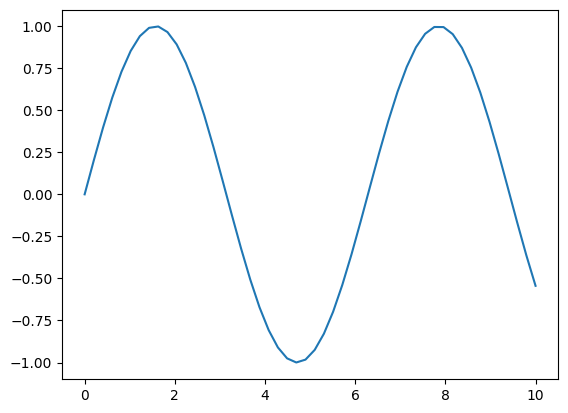

In [152]:
x = np.linspace(0,10,50,endpoint=True)
y = np.sin(x)
plt.plot(x,y)
plt.show()

### Show images

I like to use `imageio` to read and write images (using `imread` and `imwrite`).

Note that images are typically stored in unsigned 8-bit integer.

`plt.imshow` will show an image.

In [153]:
import imageio
image = imageio.imread('love_and_peace.jpg')
image.shape,image.dtype

/var/folders/cn/043rpj9s7gn508l3jykd91gh0000gn/T/ipykernel_69765/2466453400.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread('love_and_peace.jpg')


((2700, 2700, 3), dtype('uint8'))

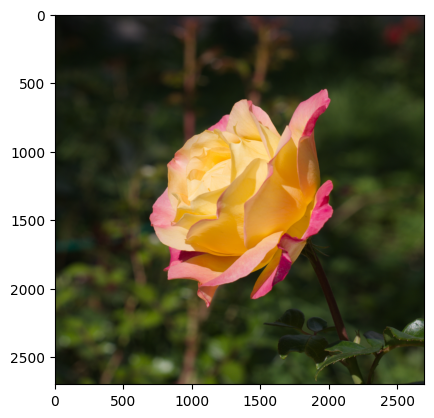

In [154]:
plt.imshow(image)
plt.show()

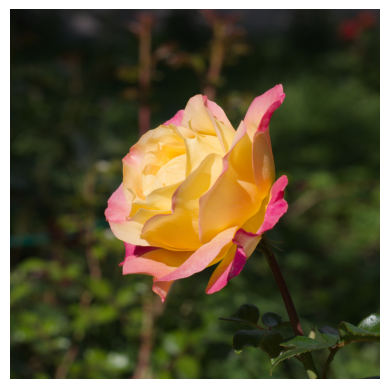

In [155]:
plt.imshow(image)
plt.axis('off')
plt.show()

Note that Matplotlib is showing the image as an RGB color image because we provided it with `uint8` data of shape `(H,W,3)`.

If you provide `imshow()` with a 2D matrix (rather than 3D) then it will interpret the matrix as arbitrary data, and it will colorize it for you.

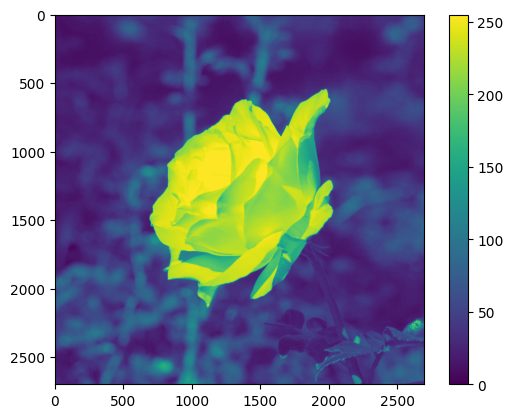

In [156]:
plt.imshow(image[:,:,0])
plt.colorbar()
plt.show()

You can select alternate colormaps, such as 'gray' for grayscale.  This does not change the data in the array -- it only changes the way Matplotlib is visualizing the data.

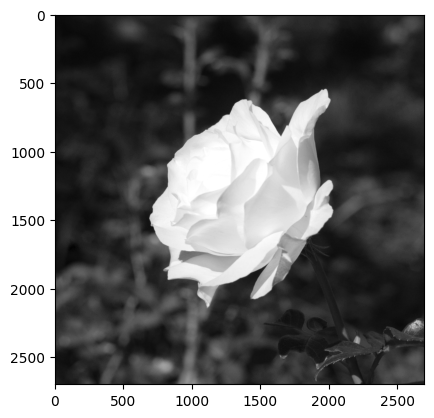

In [157]:
plt.imshow(image[:,:,0],cmap='gray')
plt.show()

If we convert the image to floating point, Matplotlib expects the data to have a minimum value of 0 and a maximum value of 1, and it will clip the data to that range if it exceeds it.  See the warning message and result image shown here.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


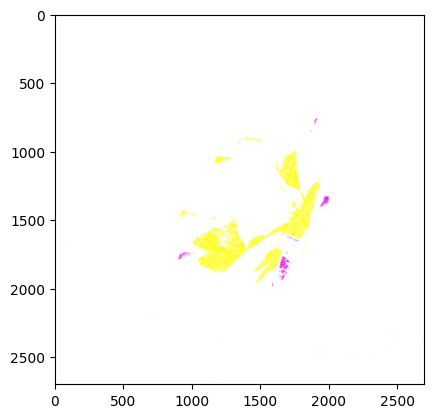

In [158]:
plt.imshow(image.astype('float32'))
plt.show()

By dividing by 255, we bring the data to the required `[0 1]` range and now Matplotlib shows the image properly.

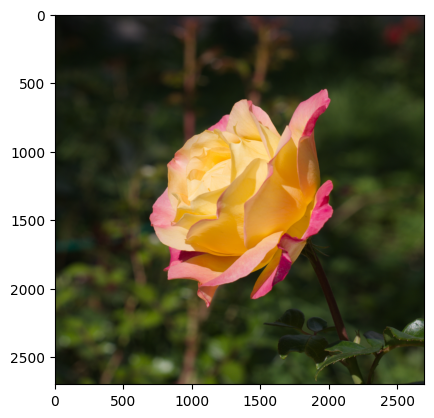

In [159]:
plt.imshow(image.astype('float32')/255)
plt.show()

### Interactive plots

Here's a simple way to make an interactive plot with a slider using `ipywidgets`.  This is great for showing a video or animation in a Python notebook.

`mimread` will read multiple images from a video file such as a GIF into a list of arrays.

In [160]:
images = imageio.mimread('Muybridge_race_horse_animated.gif')

In [161]:
len(images)

15

In [162]:
images[0].shape

(200, 300, 3)

In [163]:
from ipywidgets import interact, IntSlider

def show_video(x,cmap=None):
    def f(i):
        plt.imshow(x[i],cmap=cmap)
    interact(f, i=IntSlider(min=0, max=len(x)-1, step=1, value=0))

In [164]:
show_video(images)

interactive(children=(IntSlider(value=0, description='i', max=14), Output()), _dom_classes=('widget-interact',…

Read more about this famous animation [here](https://en.wikipedia.org/wiki/The_Horse_in_Motion).